In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
dataframe = pd.read_csv('drive/MyDrive/DATA 310/Project 2/qsar_fish_toxicity.csv', delimiter = ';' ,names = ['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','LC50 [-LOG(mol/L)]'])

In [11]:
dataframe

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [12]:
X = dataframe.iloc[:,:-1].values
y = dataframe.iloc[:,-1].values

In [13]:
def Optimal_Residuals (model, X, y, a_value, degrees):
  import seaborn as sns
  from scipy import stats
  from scipy.stats import norm
  from sklearn.linear_model import Ridge, Lasso, ElasticNet
  from sklearn.pipeline import Pipeline

  scale = StandardScaler()
  
  poly = poly = PolynomialFeatures(degrees)
  pipe = Pipeline([['Scaler',scale],['Poly Feats',poly]])
  
  test_model = model (alpha = a_value, fit_intercept = False)

  poly_X = pipe.fit_transform(X)
  
  test_model.fit(poly_X,y)

  residuals = y - test_model.predict(poly_X)

  # Distributional Plot
  DP=plt.figure
  ax1 = sns.distplot(residuals,
                    kde=False,
                    color='deepskyblue',
                    hist_kws={"color":'green','ec':'black'},
                    fit=stats.norm,
                    fit_kws={"color":'red'})
  ax1.set(xlabel='Residuals', ylabel='Frequency')

  # Quantile-Quantile Plot
  import statsmodels.api as sm
  QQ=plt.figure
  sm.qqplot(residuals/np.std(residuals), loc = 0, scale = 1, line='s',alpha=0.5)
  plt.xlim([-2.5,2.5])
  plt.ylim([-2.5,2.5])
  plt.axes().set_aspect('equal')
  plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
  plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
  plt.minorticks_on()

  # KS and Anderson Test
  dist = getattr(stats, 'norm')
  params = dist.fit(residuals)
  stats.kstest(residuals,'norm',params)
  stats.anderson(residuals,'norm')

  KS_Test = stats.kstest(residuals,'norm',params)
  AD_Test = stats.anderson(residuals,'norm')

  return DP, QQ, KS_Test, AD_Test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


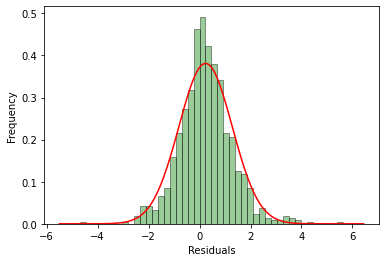

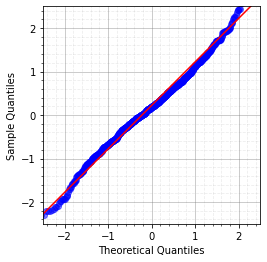

In [14]:
Dist_Plot, QQ_Plot, KS_Test, AD_Test = Optimal_Residuals(Lasso, X, y,0.2345, 2)

In [15]:
print('Kolmogorov-Smirnov Test Results:', KS_Test)
print('Anderson-Darling Test Results:', AD_Test)

Kolmogorov-Smirnov Test Results: KstestResult(statistic=0.04924004730839393, pvalue=0.02365837157411001)
Anderson-Darling Test Results: AndersonResult(statistic=3.6735430141793586, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
